In [ ]:
import pandas as pd
df = pd.read_csv("../data/raw_reviews.csv")
# group by bank and display the total count and average rating
grouped = df.groupby('bank').agg({'rating': ['count', 'mean']})
display = grouped.reset_index()
display.columns = ['bank', 'total_reviews', 'average_rating']
print(display)
df.head()

In [ ]:
# date range
date_range = df['date'].min(), df['date'].max()
print(f"Date range: {date_range[0]} to {date_range[1]}")

In [ ]:
cleaned_df = pd.read_csv("../data/cleaned_reviews.csv")
cleaned_df.describe()

In [ ]:
df = pd.read_csv("../data/raw_reviews.csv")
df.describe()

In [ ]:

import pandas as pd
en_df = pd.read_csv("../data/enriched_reviews.csv")
en_df.head()

In [ ]:
sentiment_df = pd.read_csv("../data/enriched_reviews.csv")  # Your sentiment-enriched reviews
thematic_df = pd.read_csv('../data/thematic_enriched_reviews.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Display the first few rows of each dataset
print("Sentiment Data")
print(sentiment_df.head())
print("\nThematic Data")
print(thematic_df.head())


In [ ]:
# Set seaborn style for better visualization aesthetics
sns.set(style="whitegrid")

In [ ]:
# 1. Sentiment Distribution (Pie Chart)
sentiment_dist = sentiment_df['sentiment_label'].value_counts()
plt.figure(figsize=(6, 6))
sentiment_dist.plot.pie(autopct='%1.1f%%', colors=["#222b7eff","#FFFFFF","#000000"], startangle=90, legend=False)
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [ ]:
# 2. Sentiment Score by Bank (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='bank', y='sentiment_score', data=sentiment_df, palette='coolwarm')
plt.title('Average Sentiment Score by Bank')
plt.xlabel('Bank')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 3. Sentiment Score by Rating (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='sentiment_score', data=sentiment_df, palette='Blues_d')
plt.title('Average Sentiment Score by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.show()

In [ ]:
# 1. Count of Themes per Bank (Bar Plot)
# Assuming thematic_df contains 'themes' column, which has multiple themes for each review
theme_counts_per_bank = thematic_df['themes'].str.split(',').explode().value_counts()
plt.figure(figsize=(10, 6))
theme_counts_per_bank.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top Themes by Frequency')
plt.xlabel('Themes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 2. Count of Themes per Bank (Bar Plot)
theme_counts_by_bank = thematic_df.groupby('bank')['themes'].apply(lambda x: x.str.split(',').explode().value_counts()).unstack(fill_value=0)
theme_counts_by_bank = theme_counts_by_bank.T
theme_counts_by_bank.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Theme Counts by Bank')
plt.xlabel('Themes')
plt.ylabel('Frequency')
plt.legend(title='Bank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# list themes
all_themes = thematic_df['themes'].str.split(',').explode().unique()
print("List of all themes:")
print(all_themes)

C:\Users\hp\AppData\Local\Temp\ipykernel_23988\1790590191.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='Set2', order=['positive', 'negative'])


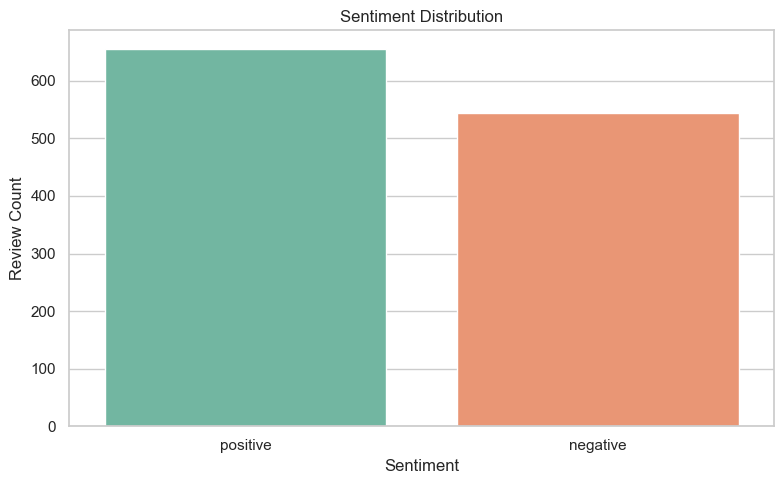

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/thematic_enriched_reviews.csv')  # replace with your actual file

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', palette='Set2', order=['positive', 'negative'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.tight_layout()
plt.show()

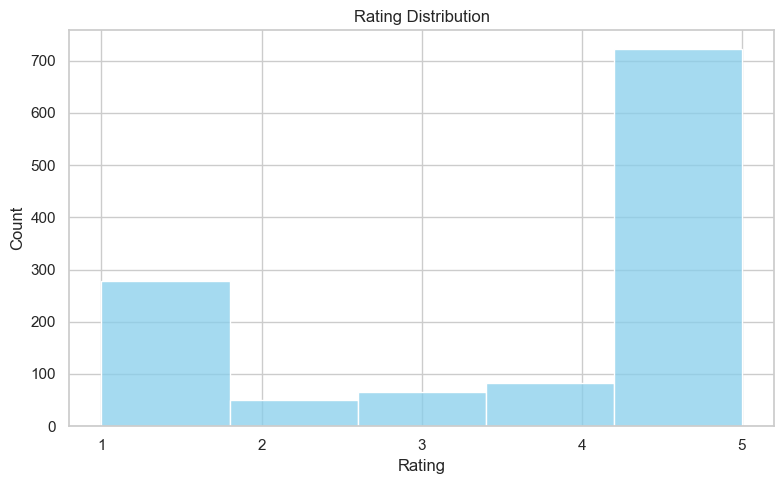

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=5, kde=False, color='skyblue')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

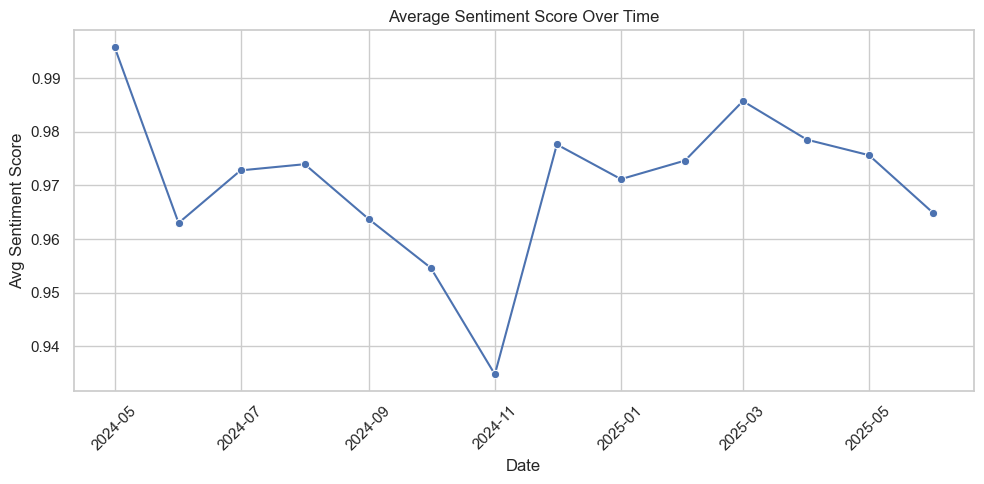

In [18]:
df['date'] = pd.to_datetime(df['date'])
sentiment_over_time = (
    df.groupby(df['date'].dt.to_period("M"))['sentiment_score']
    .mean()
    .reset_index()
)
sentiment_over_time['date'] = sentiment_over_time['date'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=sentiment_over_time, x='date', y='sentiment_score', marker='o')
plt.title("Average Sentiment Score Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Sentiment Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\hp\AppData\Local\Temp\ipykernel_23988\1036745934.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(labels), palette="viridis")


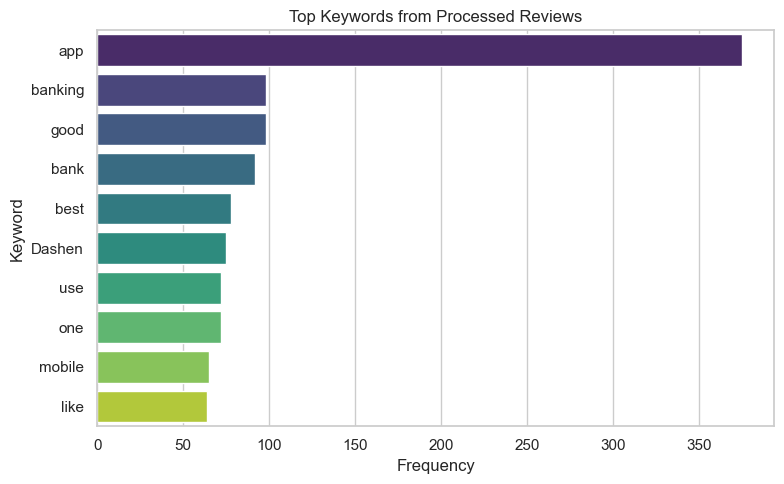

In [20]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

words = " ".join(df['review'].dropna()).split()
filtered_words = [w for w in words if w.lower() not in stop_words and len(w) > 2]
top_words = Counter(filtered_words).most_common(10)

labels, counts = zip(*top_words)
plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts), y=list(labels), palette="viridis")
plt.title("Top Keywords from Processed Reviews")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()

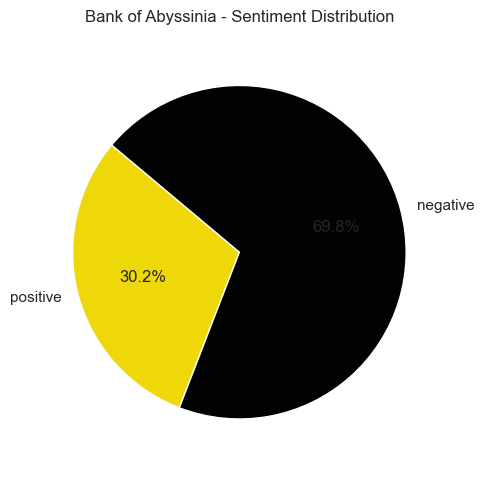

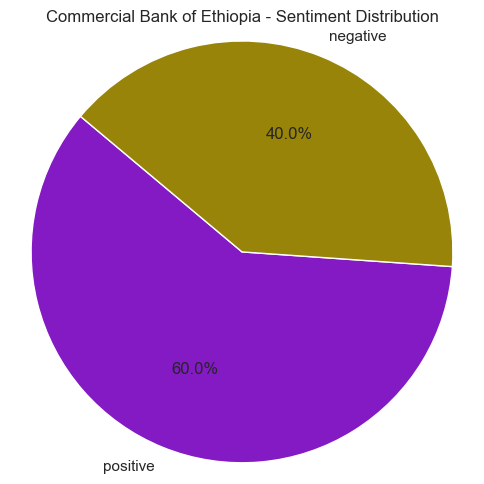

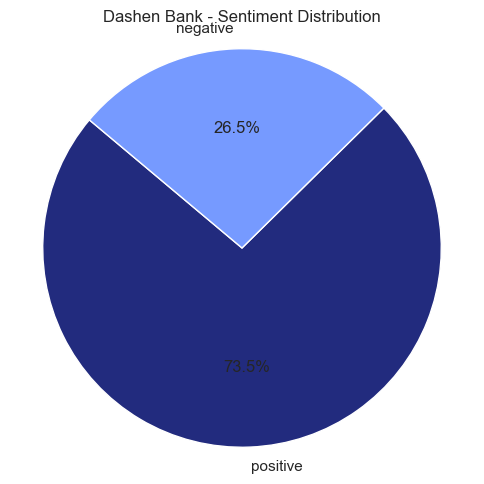

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your enriched reviews dataset
df = pd.read_csv('../data/thematic_enriched_reviews.csv')  # replace with your actual file path

# Clean nulls in sentiment and bank
df = df.dropna(subset=['sentiment_label', 'bank'])

# Bank-specific color themes
bank_colors = {
    "Commercial Bank of Ethiopia": ["#7500bde5", "#978409", "#000000"],
    "Bank of Abyssinia": ["#ffcc00ff", "#030202", "#FFFFFF"],
    "Dashen Bank": ["#222b7eff", "#769AFF", "#FFFFFF"]
}

# Get all banks in the dataset
banks = df['bank'].unique()

# Plot one pie chart per bank
for bank in banks:
    bank_data = df[df['bank'] == bank]
    sentiment_counts = bank_data['sentiment_label'].value_counts()
    
    # Sort sentiments consistently
    sentiment_counts = sentiment_counts.reindex(['positive', 'negative', 'neutral']).dropna()

    # Choose colors based on number of sentiment labels present
    colors = bank_colors.get(bank, ['#aaaaaa', '#dddddd', '#888888'])[:len(sentiment_counts)]

    plt.figure(figsize=(5, 5))
    plt.pie(sentiment_counts, 
            labels=sentiment_counts.index, 
            autopct='%1.1f%%',
            colors=colors,
            startangle=140)
    plt.title(f"{bank} - Sentiment Distribution")
    plt.axis('equal')  # Keep pie chart circular
    plt.tight_layout()
    plt.show()